# Data Merging Basics

## One-to-One Relationships

### Merging Census data with Chicago local gov data

The city of Chicago is divided into fifty local neighborhoods called wards. We have a table with data about the local government offices in each ward. 

- In this example, we will merge the local government data with census data about the population of each ward.

In [1]:
import pandas as pd

In [2]:
wards = pd.read_pickle("../data/pandas_datasets/pandas-joins/ward.p")
wards.head(10)

,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649
5,6,Roderick T. Sawyer,8001 S. MARTIN LUTHER KING DRIVE,60619
6,7,Gregory I. Mitchell,2249 EAST 95TH STREET,60617
7,8,Michelle A. Harris,8539 SOUTH COTTAGE GROVE AVENUE,60619
8,9,Anthony A. Beale,34 EAST 112TH PLACE,60628
9,10,Susan Sadlowski Garza,10500 SOUTH EWING AVENUE,60617


In [3]:
wards.shape

(50, 4)

We have information about the local government of each ward, such as the government office address. This table has 50 rows and 4 columns

In [4]:
census = pd.read_pickle("../data/pandas_datasets/pandas-joins/census.p")
census.head(10)

,ward,pop_2000,pop_2010,change,address,zip
0,1,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637
5,6,54989,52341,-5%,150 WEST 74TH STREET,60636
6,7,54593,51581,-6%,8549 SOUTH OGLESBY AVENUE,60617
7,8,54039,51687,-4%,1346-1352 EAST 75TH STREET,60649
8,9,52008,51519,-1%,11039-11059 SOUTH WENTWORTH AVENUE,60628
9,10,56613,51535,-9%,10534 SOUTH AVENUE F,46394


In [5]:
census.shape

(50, 6)

The census table contains the population of each ward in 2000 and 2010, and that change as a percentage. Additionally, it includes the address for the center of each ward. This table has 50 rows and 6 columns.

The two tables are related by their ward column. We can merge them together, matching the ward number from each row of the wards table to the ward numbers from the census table. For example, the second ward in the wards table with Alderman Brian Hopkins would be matched with row 2 of the census table where the population in 2000 was 54,361.

***Inner Join***

- The pandas package has an excellent DataFrame method for performing this type of merge called merge. The merge method takes the first DataFrame, wards, and merges it with the second DataFrame, census. We use the on argument to tell the method that we want to merge the two DataFrames on the ward column. 

- Since we listed the wards table first, its columns will appear first in the output, followed by the columns from the census table. In this example, the merge returns a DataFrame with 50 rows and 9 columns, where the returned rows have matching values for the ward column in both tables. This is called an **inner join**.

<img src="../img/inner-join.jpg" width="400" height="300">

In [6]:
wards_census = wards.merge(census, on="ward")
wards_census.head(5)

,ward,alderman,address_x,zip_x,pop_2000,pop_2010,change,address_y,zip_y
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


An inner join will only return rows that have matching values in both tables.

In [7]:
print(wards_census.columns)

Index(['ward', 'alderman', 'address_x', 'zip_x', 'pop_2000', 'pop_2010',
       'change', 'address_y', 'zip_y'],
      dtype='object')


The merged table has columns with suffixes of underscore x or y. This is because both the wards and census tables contained address and zip columns. To avoid multiple columns with the same name, they are automatically given a suffix by the merge method.

In [8]:
wards_census = wards.merge(census, on="ward", suffixes=("_ward", "_cen"))
wards_census.head(5)

,ward,alderman,address_ward,zip_ward,pop_2000,pop_2010,change,address_cen,zip_cen
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


We can use the suffix argument of the merge method to control this behavior. We provide a tuple where all of the overlapping columns in the left table are given the suffix '_ward', and those of the right table will be given the suffix '_cen'. This makes it easier for us to tell the difference between the columns.

### Taxicab owners and vehicle info data

Chicago provides a list of taxicab owners and vehicles licensed to operate within the city, for public safety. 

- We'll merge two tables together. One table is called taxi_owners, with info about the taxi cab company owners, and one is called taxi_veh, with info about each taxi cab vehicle

#### 1. Let's figure out what the most popular types of fuel used in Chicago taxis are.

In [9]:
taxi_owners = pd.read_pickle("../data/pandas_datasets/pandas-joins/taxi_owners.p")
taxi_vehicles = pd.read_pickle("../data/pandas_datasets/pandas-joins/taxi_vehicles.p")

In [10]:
taxi_owners.head(5)

,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618


In [11]:
taxi_owners.shape

(3519, 5)

In [12]:
taxi_vehicles.head(5)

,vid,make,model,year,fuel_type,owner
0,2767,TOYOTA,CAMRY,2013,HYBRID,SEYED M. BADRI
1,1411,TOYOTA,RAV4,2017,HYBRID,DESZY CORP.
2,6500,NISSAN,SENTRA,2019,GASOLINE,AGAPH CAB CORP
3,2746,TOYOTA,CAMRY,2013,HYBRID,"MIDWEST CAB CO, INC"
4,5922,TOYOTA,CAMRY,2013,HYBRID,SUMETTI CAB CO


In [13]:
taxi_vehicles.shape

(3519, 6)

In [14]:
# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_vehicles, on='vid', suffixes=('_own','_veh'))

# Print the value_counts to find the most popular fuel_type
print(taxi_own_veh['fuel_type'].value_counts())

fuel_type
HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: count, dtype: int64


## One-to-Many relationships

Let's explore one-to-many merges by merging a table of business owners, called `biz_owners`, to the `licenses` table and find out what is the most common business owner title. (i.e., secretary, CEO, or vice president).

In [15]:
licenses = pd.read_pickle("../data/pandas_datasets/pandas-joins/licenses.p")
biz_owners = pd.read_pickle("../data/pandas_datasets/pandas-joins/business_owners.p")

In [16]:
# Merge the licenses and biz_owners table on account
licenses_owners = licenses.merge(biz_owners, on="account")

# Group the results by title then count the number of accounts
counted_df = licenses_owners.groupby("title").agg({'account':'count'})

# Sort the counted_df in descending order
sorted_df = counted_df.sort_values(by="account", ascending=False)

# Use .head() method to print the first few rows of sorted_df
print(sorted_df.head())

                 account
title                   
PRESIDENT           6259
SECRETARY           5205
SOLE PROPRIETOR     1658
OTHER               1200
VICE PRESIDENT       970


## Merging Multiple Data Frames

Determine the total number of rides provided to passengers passing through the Wilson station `(station_name == 'Wilson')` on weekdays `(day_type == 'Weekday')` in July `(month == 7)` using Chicago's public transportation data. The data is available in three separate tables that need to be merged to obtain the required insights. The `cal`, `ridership`, and `stations` DataFrames have been loaded, and their relationships are shown in the diagram below.

<img src="../img/cta_ridership.jpg" width="400">

In [17]:
ridership = pd.read_pickle("../data/pandas_datasets/pandas-joins/cta_ridership.p")
ridership

,station_id,year,month,day,rides
0,40010,2019,1,1,576
1,40010,2019,1,2,1457
2,40010,2019,1,3,1543
3,40010,2019,1,4,1621
4,40010,2019,1,5,719
...,...,...,...,...,...
3280,41660,2019,12,27,13898
3281,41660,2019,12,28,9485
3282,41660,2019,12,29,7581
3283,41660,2019,12,30,15332


In [18]:
cal = pd.read_pickle("../data/pandas_datasets/pandas-joins/cta_calendar.p")
cal

,year,month,day,day_type
0,2019,1,1,Sunday/Holiday
1,2019,1,2,Weekday
2,2019,1,3,Weekday
3,2019,1,4,Weekday
4,2019,1,5,Saturday
...,...,...,...,...
360,2019,12,27,Weekday
361,2019,12,28,Saturday
362,2019,12,29,Sunday/Holiday
363,2019,12,30,Weekday


In [19]:
stations = pd.read_pickle("../data/pandas_datasets/pandas-joins/stations.p")
stations

,station_id,station_name,location
0,40010,Austin-Forest Park,"(41.870851, -87.776812)"
1,40020,Harlem-Lake,"(41.886848, -87.803176)"
2,40030,Pulaski-Lake,"(41.885412, -87.725404)"
3,40040,Quincy/Wells,"(41.878723, -87.63374)"
4,40050,Davis,"(42.04771, -87.683543)"
...,...,...,...
139,41660,Lake/State,"(41.884809, -87.627813)"
140,41670,Conservatory,"(41.884904, -87.716523)"
141,41680,Oakton-Skokie,"(42.02624348, -87.74722084)"
142,41690,Cermak-McCormick Place,"(41.853115, -87.626402)"


In [20]:
# Total riders in a month
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
							.merge(stations, on='station_id')

In [21]:
# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == 'Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

In [22]:
# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

140005


Wilson station had 140,005 riders during weekdays in July.

In [23]:
zip_demo = pd.read_pickle("../data/pandas_datasets/pandas-joins/zip_demo.p")
zip_demo

,zip,income
0,60630,70122
1,60640,50488
2,60622,87143
3,60614,100116
4,60608,41226
...,...,...
61,53045,100438
62,60076,74964
63,60126,103454
64,60458,47411


In [24]:
# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on="zip") \
							.merge(wards, on="ward")


# Print the results by alderman and show median income
print(licenses_zip_ward.groupby("alderman").agg({'income':'median'}))

                             income
alderman                           
Ameya Pawar                 66246.0
Anthony A. Beale            38206.0
Anthony V. Napolitano       82226.0
Ariel E. Reyboras           41307.0
Brendan Reilly             110215.0
Brian Hopkins               87143.0
Carlos Ramirez-Rosa         66246.0
Carrie M. Austin            38206.0
Chris Taliaferro            55566.0
Daniel "Danny" Solis        41226.0
David H. Moore              33304.0
Deborah Mell                66246.0
Debra L. Silverstein        50554.0
Derrick G. Curtis           65770.0
Edward M. Burke             42335.0
Emma M. Mitts               36283.0
George Cardenas             33959.0
Gilbert Villegas            41307.0
Gregory I. Mitchell         24941.0
Harry Osterman              45442.0
Howard B. Brookins, Jr.     33304.0
James Cappleman             79565.0
Jason C. Ervin              41226.0
Joe Moore                   39163.0
John S. Arena               70122.0
Leslie A. Hairston          

We see that only a few aldermen represent businesses in areas where the median income is greater than $62,000, which is the median income for the state of Illinois.

## One-to-many merge with multiple tables

Identifying an optimal location in Chicago for a goat-based lawn mowing business. The ideal location should have ample space and a low density of businesses and residents to minimize potential complaints. To determine the best area, three tables will be merged to analyze space availability and population distribution.

In [25]:
land_use = pd.read_pickle("../data/pandas_datasets/pandas-joins/land_use.p")
land_use.head(2)

,ward,residential,commercial,industrial,vacant,other
0,1,41,9,2,2,46
1,2,31,11,6,2,50


In [26]:
licenses.head(2)

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633


In [27]:
census.head(2)

,ward,pop_2000,pop_2010,change,address,zip
0,1,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622


In [28]:

# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen','_lic'))

# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'], 
                                   as_index=False).agg({'account':'count'})

In [29]:
land_cen_lic.head(5)

,ward,residential,commercial,industrial,vacant,other,pop_2000,pop_2010,change,address_cen,zip_cen,account,aid,business,address_lic,zip_lic
0,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,12024,NaN,DIGILOG ELECTRONICS,1038 N ASHLAND AVE,60622
1,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14446,743,EMPTY BOTTLE INC,1035 N WESTERN AVE 1ST,60622
2,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14624,775,LITTLE MEL'S HOT DOG,2205 N CALIFORNIA AVE,60647
3,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14987,NaN,MR. BROWN'S LOUNGE,2301 W CHICAGO AVE 1ST,60622
4,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,15642,814,Beat Kitchen,2000-2100 W DIVISION ST,60622


In [30]:
pop_vac_lic.head(5)

,ward,pop_2010,vacant,account
0,1,56149,2,253
1,10,51535,14,130
2,11,51497,5,201
3,12,52235,4,255
4,13,53722,1,101


In [31]:
# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(["vacant","account","pop_2010"], 
                                             ascending=(False, True, True))

# Print the top few rows of sorted_pop_vac_lic
print(sorted_pop_vac_lic.head())

   ward  pop_2010  vacant  account
47    7     51581      19       80
12   20     52372      15      123
1    10     51535      14      130
16   24     54909      13       98
7    16     51954      13      156


The 7th ward would be a good place to build the goat farm!

# Merging Tables With Different Join Types

***Left Join***

A left join returns all rows of data from the left table and only those rows from the right table where key columns match.

<img src="../img/left-join.jpg" width="300">

Data: The Movie Database, a community-built movie database with info on thousands of movies, their casts, and popularity.

Table 1: Named movies, holds information about individual movies such as the title name and its popularity. Additionally, each movie is given an ID number. Our table starts with 4,803 rows of data.

Table 2: Named taglines, contains a movie ID number and the tag line for the movie. Notice that this table has almost 4,000 rows of data, so it contains fewer movies than the movies table.

In [32]:
movies = pd.read_pickle("../data/pandas_datasets/pandas-joins/movies.p")
movies.head(5)

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


In [33]:
taglines = pd.read_pickle("../data/pandas_datasets/pandas-joins/taglines.p")
taglines.head(5)

,id,tagline
0,19995,Enter the World of Pandora.
1,285,"At the end of the world, the adventure begins."
2,206647,A Plan No One Escapes
3,49026,The Legend Ends
4,49529,"Lost in our world, found in another."


In [34]:
print(movies.shape, "\n", taglines.shape)

(4803, 4) 
 (3955, 2)


In [35]:
movies_taglines = movies.merge(taglines, on="id", how="left")
movies_taglines.head(5)

,id,title,popularity,release_date,tagline
0,257,Oliver Twist,20.415572,2005-09-23,NaN
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,Never underestimate an overachiever.
2,38365,Grown Ups,38.864027,2010-06-24,Boys will be boys. . . some longer than others.
3,9672,Infamous,3.680896,2006-11-16,There's more to the story than you know
4,12819,Alpha and Omega,12.300789,2010-09-17,A Pawsome 3D Adventure


The result of the merge shows a table with all of the rows from the movies table and a value for tag line where the ID column matches in both tables. Wherever there isn't a matching ID in the taglines table, a null value is entered for the tag line. Remember that pandas uses NaN to denote missing data.

In [36]:
print(movies_taglines.shape)

(4803, 5)


After the merge, our resulting table has 4,805 rows. This is because we are returning all of the rows of data from the movies table, and the relationship between the movies table and taglines is one-to-one. Therefore, in a one-to-one merge like this one, a left join will always return the same number rows as the left table.

In [37]:
financials = pd.read_pickle("../data/pandas_datasets/pandas-joins/financials.p")

In [38]:
# Merge the movies table with the financials table with a left join
movies_financials = movies.merge(financials, on='id', how='left')

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isna().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)

1574


We see that there are at least 1,500 rows missing data.

**Note**:
- If the goal is to enhance or enrich a dataset, then you do not want to lose any of your original data. A left join will do that by returning all of the rows of your left table, while using an inner join may result in lost data if it does not exist in both tables.
- A left join will return all of the rows from the left table. If those rows in the left table match multiple rows in the right table, then all of those rows will be returned. Therefore, the returned rows must be equal to if not greater than the left table.

***Right Join***

- It will return all of the rows from the right table and includes only those rows from the left table that have matching values. It is the mirror opposite of the left join.

<img src="../img/right-join.jpg" width="300">

- The movie_to_genres table contains a list of movies with their associated genres, allowing multiple genres per movie.

- Filtering the data to create a subset of movies belonging to the TV Movie genre for use in a right join example.

- Merging the filtered data with the movies table, setting movies as the left table and the tv_genre table as the right table. A right join is used to ensure that no data is missing from the movies table. Additionally, the merge method accounts for column name differences, where the movie ID is stored as 'id' in the movies table and 'movie_id' in the tv_genre table.


In [39]:
tv_genre = pd.read_pickle("../data/pandas_datasets/pandas-joins/movie_to_genres.p")
tv_genre.head(2)

,movie_id,genre
0,5,Crime
1,5,Comedy


In [40]:
tv_movies = movies.merge(tv_genre, how='right', left_on='id', right_on='movie_id')
tv_movies.head(5)

,id,title,popularity,release_date,movie_id,genre
0,5,Four Rooms,22.876230,1995-12-09,5,Crime
1,5,Four Rooms,22.876230,1995-12-09,5,Comedy
2,11,Star Wars,126.393695,1977-05-25,11,Science Fiction
3,11,Star Wars,126.393695,1977-05-25,11,Action
4,11,Star Wars,126.393695,1977-05-25,11,Adventure


In [41]:
tv_movies.isna().sum()

id              0
title           0
popularity      0
release_date    0
movie_id        0
genre           0
dtype: int64

In [42]:
# Subsetting only science fiction movies from tv_genre dataframe that contains movie id and the genre it belongs to
scifi_movies = tv_genre[tv_genre['genre'] == 'Science Fiction']
scifi_movies.head(5)

,movie_id,genre
2,11,Science Fiction
17,18,Science Fiction
20,19,Science Fiction
38,38,Science Fiction
49,62,Science Fiction


In [43]:
# Subsetting only action movies from tv_genre dataframe that contains movie id and the genre it belongs to
action_movies = tv_genre[tv_genre['genre'] == 'Action']
action_movies.head(5)

,movie_id,genre
3,11,Action
14,18,Action
25,22,Action
26,24,Action
42,58,Action


Perform a **right join** to identify movies that are classified solely as science fiction. The dataset includes two tables: `scifi_movies`, containing science fiction films, and `action_movies`, listing action films. Many big-budget science fiction films also belong to the action genre, so the objective is to find movies that appear only in the `scifi_movies` table. After isolating these movies, merge the result with the movies table to retrieve the corresponding movie names. A **right join** is used to effectively filter and analyze the dataset.

In [44]:
# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act','_sci'))

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]

# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, left_on='id', right_on='movie_id', how='inner')

# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)

      id                         title  popularity release_date  movie_id  \
0  18841  The Lost Skeleton of Cadavra    1.680525   2001-09-12     18841   
1  26672     The Thief and the Cobbler    2.439184   1993-09-23     26672   
2  15301      Twilight Zone: The Movie   12.902975   1983-06-24     15301   
3   8452                   The 6th Day   18.447479   2000-11-17      8452   
4   1649    Bill & Ted's Bogus Journey   11.349664   1991-07-19      1649   

  genre_act        genre_sci  
0       NaN  Science Fiction  
1       NaN  Science Fiction  
2       NaN  Science Fiction  
3       NaN  Science Fiction  
4       NaN  Science Fiction  
(258, 7)


***Popular genres with right join***


In [45]:
# the top 10 most popular movies in the movies table have been selected assigned to pop_movies dataframe
pop_movies = movies.sort_values(by='popularity', ascending=False).head(10).reset_index(drop=True)
pop_movies

,id,title,popularity,release_date
0,211672,Minions,875.581305,2015-06-17
1,157336,Interstellar,724.247784,2014-11-05
2,293660,Deadpool,514.569956,2016-02-09
3,118340,Guardians of the Galaxy,481.098624,2014-07-30
4,76341,Mad Max: Fury Road,434.278564,2015-05-13
5,135397,Jurassic World,418.708552,2015-06-09
6,22,Pirates of the Caribbean: The Curse of the Bla...,271.972889,2003-07-09
7,119450,Dawn of the Planet of the Apes,243.791743,2014-06-26
8,131631,The Hunger Games: Mockingjay - Part 1,206.227151,2014-11-18
9,177572,Big Hero 6,203.734590,2014-10-24


In [46]:
# merging pop_movies with tv_genre using right join to get the genres of the top 10 popular movies
genres_movies = tv_genre.merge(pop_movies, how='right', left_on='movie_id', right_on='id')
genres_movies.head(5)

,movie_id,genre,id,title,popularity,release_date
0,211672,Comedy,211672,Minions,875.581305,2015-06-17
1,211672,Adventure,211672,Minions,875.581305,2015-06-17
2,211672,Animation,211672,Minions,875.581305,2015-06-17
3,211672,Family,211672,Minions,875.581305,2015-06-17
4,157336,Drama,157336,Interstellar,724.247784,2014-11-05


In [47]:
# counting the number of popular movies 
genre_count = genres_movies.groupby('genre').agg({'id':'count'})
genre_count

,id
genre,
Action,7
Adventure,9
Animation,2
Comedy,3
Drama,2
Family,2
Fantasy,1
Science Fiction,6
Thriller,4


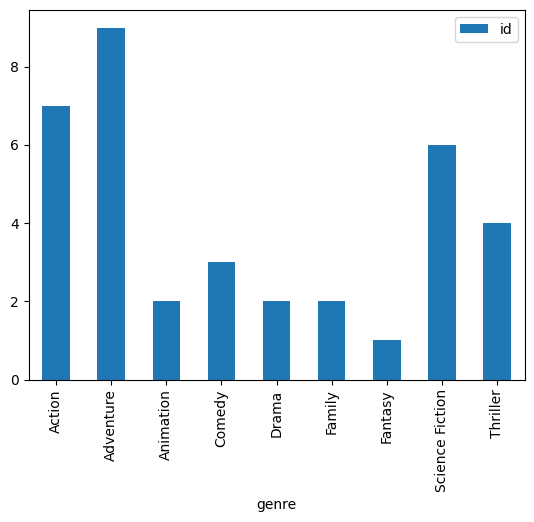

In [48]:
# Plot a bar chart of the genre_count
import matplotlib.pyplot as plt
genre_count.plot(kind='bar')
plt.show()

***Outer Join***

An outer join will return all of the rows from both tables regardless if there is a match between the tables.

<img src="../img/outer-join.jpg" width="300">

***Using outer join to select actors***

***Self Join***

<img src='../img/self-join.jpg' width='700'>

When to merge a table to itself

- Hierarchical relationships
- Sequential relationships
- Graph data

Merging a table with itself is useful for comparing values within the same column. In this task, a new table is created where each movie is associated with both its director and a crew member in a single row. The dataset consists of a crews table with columns: id, job, and name.

The process involves:

- Performing a self-merge on the crews table using the movie ID.
- Creating a larger dataset where every job is matched with every other job for the same movie.
- Filtering the results to retain only rows where the left table contains a director, while ensuring that the director’s job is not repeated in both the left and right tables.

This filtering step removes unwanted job combinations that do not involve a director.

In [49]:
crews = pd.read_pickle('../data/pandas_datasets/pandas-joins/crews.p')
crews.head(5)

,id,department,job,name
0,19995,Editing,Editor,Stephen E. Rivkin
2,19995,Sound,Sound Designer,Christopher Boyes
4,19995,Production,Casting,Mali Finn
6,19995,Directing,Director,James Cameron
7,19995,Writing,Writer,James Cameron


In [50]:
crews_df = crews.drop(columns=['department'])
crews_df

,id,job,name
0,19995,Editor,Stephen E. Rivkin
2,19995,Sound Designer,Christopher Boyes
4,19995,Casting,Mali Finn
6,19995,Director,James Cameron
7,19995,Writer,James Cameron
...,...,...,...
129574,126186,Director,Daniel Hsia
129576,25975,Executive Producer,Clark Peterson
129578,25975,Director,Brian Herzlinger
129579,25975,Director,Jon Gunn


In [51]:
# Merge the crews table to itself
crews_self_merged = crews_df.merge(crews_df, on='id', how='inner',
                                suffixes=('_dir','_crew'))

In [52]:
crews_self_merged

,id,job_dir,name_dir,job_crew,name_crew
0,19995,Editor,Stephen E. Rivkin,Editor,Stephen E. Rivkin
1,19995,Editor,Stephen E. Rivkin,Sound Designer,Christopher Boyes
2,19995,Editor,Stephen E. Rivkin,Casting,Mali Finn
3,19995,Editor,Stephen E. Rivkin,Director,James Cameron
4,19995,Editor,Stephen E. Rivkin,Writer,James Cameron
...,...,...,...,...,...
834189,25975,Director,Jon Gunn,Director,Brett Winn
834190,25975,Director,Brett Winn,Executive Producer,Clark Peterson
834191,25975,Director,Brett Winn,Director,Brian Herzlinger
834192,25975,Director,Brett Winn,Director,Jon Gunn


In [53]:
# Create a boolean index to select the appropriate rows
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & 
                  (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

In [54]:
# Print the first few rows of direct_crews
print(direct_crews.head())

        id   job_dir       name_dir        job_crew          name_crew
156  19995  Director  James Cameron          Editor  Stephen E. Rivkin
157  19995  Director  James Cameron  Sound Designer  Christopher Boyes
158  19995  Director  James Cameron         Casting          Mali Finn
160  19995  Director  James Cameron          Writer      James Cameron
161  19995  Director  James Cameron    Set Designer    Richard F. Mays


With the output, we can quickly see different movie directors and the people they worked with in the same movie.

***Merging on Indexes***
- Merge tables using their indexes - Often, the DataFrame indexes are given a unique id that we can use when merging two tables together.


In [55]:
# Getting the ratings pickle file into pandas dataframe and setting the id column as index.
# As it's a pickle file we're using set_index() to set the index. If it was a CSV index_col argument can be used while reading the csv.
ratings = pd.read_pickle("../data/pandas_datasets/pandas-joins/ratings.p")
ratings = ratings.set_index('id')
ratings.head(5)

,vote_average,vote_count
id,,
19995,7.2,11800.0
285,6.9,4500.0
206647,6.3,4466.0
49026,7.6,9106.0
49529,6.1,2124.0


In [56]:
movies_index = movies.set_index('id')
movies_index

,title,popularity,release_date
id,,,
257,Oliver Twist,20.415572,2005-09-23
14290,Better Luck Tomorrow,3.877036,2002-01-12
38365,Grown Ups,38.864027,2010-06-24
9672,Infamous,3.680896,2006-11-16
12819,Alpha and Omega,12.300789,2010-09-17
...,...,...,...
3089,Red River,5.344815,1948-08-26
11934,The Hudsucker Proxy,14.188982,1994-03-11
13807,Exiled,8.486390,2006-09-06


In [57]:
# Merge to the movies table the ratings table on the index
movies_ratings = movies_index.merge(ratings, on='id')

# Print the first few rows of movies_ratings
print(movies_ratings.head())

                      title  popularity release_date  vote_average  vote_count
id                                                                            
257            Oliver Twist   20.415572   2005-09-23           6.7       274.0
14290  Better Luck Tomorrow    3.877036   2002-01-12           6.5        27.0
38365             Grown Ups   38.864027   2010-06-24           6.0      1705.0
9672               Infamous    3.680896   2006-11-16           6.4        60.0
12819       Alpha and Omega   12.300789   2010-09-17           5.3       124.0


Analyzing the revenue difference between movie sequels and their original films. This involves merging a modified version of the sequels and financials tables, where the index is set to the movie ID.
- Let's choose a merge type that will retain all rows from the sequels table, while not all rows from the financials table need to be included. 
- The resulting table is then merged with itself to compare the revenue of the original movie to its sequel. 
- Finally, the revenue difference is calculated and the dataset is sorted to identify the sequels that earned the most compared to their originals.

In [58]:
sequels = pd.read_pickle("../data/pandas_datasets/pandas-joins/sequels.p")

# Setting the `id` column to be the index of the dataframe
sequels_index = sequels.set_index('id')
sequels_index.head(5)

,title,sequel
id,,
19995,Avatar,<NA>
862,Toy Story,863
863,Toy Story 2,10193
597,Titanic,<NA>
24428,The Avengers,<NA>


In [59]:
# Setting the `id` column of financials to be the index column of the financials dataframe
financials_index = financials.set_index('id')
financials_index.head(5)

,budget,revenue
id,,
19995,237000000,2.787965e+09
285,300000000,9.610000e+08
206647,245000000,8.806746e+08
49026,250000000,1.084939e+09
49529,260000000,2.841391e+08


In [60]:
# Merge sequels and financials on index id
sequels_fin = sequels_index.merge(financials_index, on='id', how='left')
sequels_fin

,title,sequel,budget,revenue
id,,,,
19995,Avatar,<NA>,237000000.0,2.787965e+09
862,Toy Story,863,30000000.0,3.735540e+08
863,Toy Story 2,10193,90000000.0,4.973669e+08
597,Titanic,<NA>,200000000.0,1.845034e+09
24428,The Avengers,<NA>,220000000.0,1.519558e+09
...,...,...,...,...
133931,Zambezia,<NA>,NaN,NaN
309503,Zipper,<NA>,NaN,NaN
34592,ZMD: Zombies of Mass Destruction,<NA>,NaN,NaN


In [61]:
# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', 
                             right_on='id', right_index=True,
                             suffixes=('_org','_seq'))

In [62]:
orig_seq

,sequel,title_org,sequel_org,budget_org,revenue_org,title_seq,sequel_seq,budget_seq,revenue_seq
id,,,,,,,,,
862,863,Toy Story,863,30000000.0,373554033.0,Toy Story 2,10193,90000000.0,4.973669e+08
863,10193,Toy Story 2,10193,90000000.0,497366869.0,Toy Story 3,<NA>,200000000.0,1.066970e+09
675,767,Harry Potter and the Order of the Phoenix,767,150000000.0,938212738.0,Harry Potter and the Half-Blood Prince,<NA>,250000000.0,9.339592e+08
121,122,The Lord of the Rings: The Two Towers,122,79000000.0,926287400.0,The Lord of the Rings: The Return of the King,<NA>,94000000.0,1.118889e+09
120,121,The Lord of the Rings: The Fellowship of the Ring,121,93000000.0,871368364.0,The Lord of the Rings: The Two Towers,122,79000000.0,9.262874e+08
...,...,...,...,...,...,...,...,...,...
76,80,Before Sunrise,80,2500000.0,5535405.0,Before Sunset,132344,2700000.0,1.599262e+07
2292,2295,Clerks,2295,27000.0,3151130.0,Clerks II,<NA>,5000000.0,2.688838e+07
9367,8068,El Mariachi,8068,220000.0,2040920.0,Desperado,1428,7000000.0,2.540544e+07


In [63]:
# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org','title_seq','diff']]

# Print the first rows of the sorted titles_diff
print(titles_diff.sort_values('diff', ascending=False).head())

               title_org        title_seq          diff
id                                                     
331    Jurassic Park III   Jurassic World  1.144748e+09
272        Batman Begins  The Dark Knight  6.303398e+08
10138         Iron Man 2       Iron Man 3  5.915067e+08
863          Toy Story 2      Toy Story 3  5.696028e+08
10764  Quantum of Solace          Skyfall  5.224703e+08


- To complete this task we needed to merge tables on their index and merge another table to itself. 
- After the calculations were added and sub-select specific columns, the data was sorted. 
- We found out that Jurassic World had one of the highest of all, improvement in revenue compared to the original movie.

# Advanced Merging and Concatenating

- Implementing powerful filtering techniques such as semi-joins and anti-joins. 
- Utilizing the pandas.concat function to vertically combine DataFrames and create new datasets.
- Additionally, applying data validation methods to ensure the integrity and cleanliness of the newly combined data structures.

#### Filtering Joins

Mutating Joins
- Combines data from 2 tables based on matching observations in 2 tables.

Filtering Joins
- Filter observations from a table based on whether or not they match an observation in another table

**1. Semi Join**

<img src="../img/semi-join.jpg" width="700">

- A semi join filters the left table down to those observations that have a match in the right table. 
- It is similar to an inner join where only the intersection between the tables is returned.
- Unlike an inner join, only the columns from the left table are shown. 
- No duplicate rows from the left table are returned, even if there is a one-to-many relationship.

In [64]:
# creating the top_invoices dataframe
data = {
    'ilid': [470, 473, 476, 527, 528, 533, 1098, 1100, 1668, 1670, 1678, 1686, 2190, 2192, 2194, 2240],
    'iid': [88, 88, 88, 96, 96, 99, 201, 202, 306, 307, 310, 312, 404, 404, 404, 412],
    'tid': [2832, 2850, 2868, 3214, 3223, 3250, 3200, 3223, 3177, 3200, 3214, 3250, 2832, 2850, 2868, 3177],
    'uprice': [1.99] * 16,
    'quantity': [1] * 16
}

# Create DataFrame
top_invoices = pd.DataFrame(data)

# Show the DataFrame
print(top_invoices.head(5))


   ilid  iid   tid  uprice  quantity
0   470   88  2832    1.99         1
1   473   88  2850    1.99         1
2   476   88  2868    1.99         1
3   527   96  3214    1.99         1
4   528   96  3223    1.99         1


In [65]:
# Creating the genres dataframe
data = {
    'gid': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
    'name': ['Rock', 'Jazz', 'Metal', 'Alternative & Punk', 'Rock And Roll', 'Blues', 'Latin', 'Reggae', 'Pop', 
             'Soundtrack', 'Bossa Nova', 'Easy Listening', 'Heavy Metal', 'R&B/Soul', 'Electronica/Dance', 'World', 
             'Hip Hop/Rap', 'Science Fiction', 'TV Shows', 'Sci Fi & Fantasy', 'Drama', 'Comedy', 'Alternative', 
             'Classical', 'Opera']
}

# Create DataFrame
genres = pd.DataFrame(data)

# Show the DataFrame
print(genres.head(5))


   gid                name
0    1                Rock
1    2                Jazz
2    3               Metal
3    4  Alternative & Punk
4    5       Rock And Roll


```python
`non_mus_tcks` must be created before executing the below cell.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 2819 to 3428
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tid      200 non-null    int64  
 1   name     200 non-null    object 
 2   aid      200 non-null    int64  
 3   mtid     200 non-null    int64  
 4   gid      200 non-null    int64  
 5   u_price  200 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 10.9+ KB

In [66]:
# # Merge the non_mus_tcks and top_invoices tables on tid
# tracks_invoices = non_mus_tcks.merge(top_invoices, on='tid')

# # Use .isin() to subset non_mus_tcks to rows with tid in tracks_invoices
# top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]

# # Group the top_tracks by gid and count the tid rows
# cnt_by_gid = top_tracks.groupby(['gid'], as_index=False).agg({'tid':'count'})

# # Merge the genres table to cnt_by_gid on gid and print
# print(cnt_by_gid.merge(genres, on='gid'))

In this task, we replicated a semi join to filter the table of tracks by the table of invoice items to find the top revenue non-musical tracks. With some additional data manipulation, you discovered that _'TV-shows'_ is the non-musical genre that has the most top revenue-generating tracks

**2. Anti Join**

<img src="../img/anti-join.jpg" width="700">

- An anti join returns the observations in the left table that do not have a matching observation in the right table.
- Returns only columns from the left table and **not** the right table.

- In the music streaming company dataset, each customer is assigned an employee representative to assist them. 
- In this task, filter the employee table by a table of top customers, returning only those employees who are not assigned to a customer. 
- The results should resemble the results of an anti join. The company's leadership will assign these employees additional training so that they can work with high valued customers.

The `top_cust` and `employees` tables are created below.

In [67]:
# Creating the DataFrame
employees = pd.DataFrame({
    "srid": [1, 2, 3, 4, 5, 6, 7, 8],
    "lname": ["Adams", "Edwards", "Peacock", "Park", "Johnson", "Mitchell", "King", "Callahan"],
    "fname": ["Andrew", "Nancy", "Jane", "Margaret", "Steve", "Michael", "Robert", "Laura"],
    "title": ["General Manager", "Sales Manager", "Sales Support Agent", "Sales Support Agent",
              "Sales Support Agent", "IT Manager", "IT Staff", "IT Staff"],
    "hire_date": pd.to_datetime(["2002-08-14", "2002-05-01", "2002-04-01", "2003-05-03",
                                 "2003-10-17", "2003-10-17", "2004-01-02", "2004-03-04"]),
    "email": ["andrew@chinookcorp.com", "nancy@chinookcorp.com", "jane@chinookcorp.com",
              "margaret@chinookcorp.com", "steve@chinookcorp.com", "michael@chinookcorp.com",
              "robert@chinookcorp.com", "laura@chinookcorp.com"]
})

# Display the DataFrame
print(employees)


   srid     lname     fname                title  hire_date  \
0     1     Adams    Andrew      General Manager 2002-08-14   
1     2   Edwards     Nancy        Sales Manager 2002-05-01   
2     3   Peacock      Jane  Sales Support Agent 2002-04-01   
3     4      Park  Margaret  Sales Support Agent 2003-05-03   
4     5   Johnson     Steve  Sales Support Agent 2003-10-17   
5     6  Mitchell   Michael           IT Manager 2003-10-17   
6     7      King    Robert             IT Staff 2004-01-02   
7     8  Callahan     Laura             IT Staff 2004-03-04   

                      email  
0    andrew@chinookcorp.com  
1     nancy@chinookcorp.com  
2      jane@chinookcorp.com  
3  margaret@chinookcorp.com  
4     steve@chinookcorp.com  
5   michael@chinookcorp.com  
6    robert@chinookcorp.com  
7     laura@chinookcorp.com  


In [68]:
# top_cust table
data = {
    "cid": range(1, 60),
    "srid": [3, 5, 3, 4, 4, 5, 5, 4, 4, 4, 5, 3, 4, 5, 3, 4, 5, 3, 3, 4, 5, 4, 4, 3, 5, 4, 4, 5, 3, 3, 5, 4, 3, 4, 4, 5, 3, 3, 4, 4, 5, 3, 3, 3, 3, 3, 5, 5, 4, 5, 5, 3, 3, 5, 4, 4, 5, 3, 3],
    "fname": [
        "Luís", "Leonie", "François", "Bjørn", "František", "Helena", "Astrid", "Daan", "Kara", "Eduardo",
        "Alexandre", "Roberto", "Fernanda", "Mark", "Jennifer", "Frank", "Jack", "Michelle", "Tim", "Dan",
        "Kathy", "Heather", "John", "Frank", "Victor", "Richard", "Patrick", "Julia", "Robert", "Edward",
        "Martha", "Aaron", "Ellie", "João", "Madalena", "Hannah", "Fynn", "Niklas", "Camille", "Dominique",
        "Marc", "Wyatt", "Isabelle", "Terhi", "Ladislav", "Hugh", "Lucas", "Johannes", "Stanisław", "Enrique",
        "Joakim", "Emma", "Phil", "Steve", "Mark", "Diego", "Luis", "Manoj", "Puja"
    ],
    "lname": [
        "Gonçalves", "Köhler", "Tremblay", "Hansen", "Wichterlová", "Holý", "Gruber", "Peeters", "Nielsen", "Martins",
        "Rocha", "Almeida", "Ramos", "Philips", "Peterson", "Harris", "Smith", "Brooks", "Goyer", "Miller",
        "Chase", "Leacock", "Gordon", "Ralston", "Stevens", "Cunningham", "Gray", "Barnett", "Brown", "Francis",
        "Silk", "Mitchell", "Sullivan", "Fernandes", "Sampaio", "Schneider", "Zimmermann", "Schröder", "Bernard", "Lefebvre",
        "Dubois", "Girard", "Mercier", "Hämäläinen", "Kovács", "O'Reilly", "Mancini", "Van der Berg", "Wójcik", "Muñoz",
        "Johansson", "Jones", "Hughes", "Murray", "Taylor", "Gutiérrez", "Rojas", "Pareek", "Srivastava"
    ],
    "phone": [
        "+55 (12) 3923-5555", "+49 0711 2842222", "+1 (514) 721-4711", "+47 22 44 22 22", "+420 2 4172 5555", "+420 2 4177 0449",
        "+43 01 5134505", "+32 02 219 03 03", "+453 3331 9991", "+55 (11) 3033-5446", "+55 (11) 3055-3278", "+55 (21) 2271-7000",
        "+55 (61) 3363-5547", "+1 (780) 434-4554", "+1 (604) 688-2255", "+1 (650) 253-0000", "+1 (425) 882-8080", "+1 (212) 221-3546",
        "+1 (408) 996-1010", "+1 (650) 644-3358", "+1 (775) 223-7665", "+1 (407) 999-7788", "+1 (617) 522-1333", "+1 (312) 332-3232",
        "+1 (608) 257-0597", "+1 (817) 924-7272", "+1 (520) 622-4200", "+1 (801) 531-7272", "+1 (416) 363-8888", "+1 (613) 234-3322",
        "+1 (902) 450-0450", "+1 (204) 452-6452", "+1 (867) 920-2233", "+351 (213) 466-111", "+351 (225) 022-448", "+49 030 26550280",
        "+49 069 40598889", "+49 030 2141444", "+33 01 49 70 65 65", "+33 01 47 42 71 71", "+33 04 78 30 30 30", "+33 05 56 96 96 96",
        "+33 03 80 73 66 99", "+358 09 870 2000", "NaN", "+353 01 6792424", "+39 06 39733434", "+31 020 6223130", "+48 22 828 37 39",
        "+34 914 454 454", "+46 08-651 52 52", "+44 020 7707 0707", "+44 020 7976 5722", "+44 0131 315 3300", "+61 (02) 9332 3633",
        "+54 (0)11 4311 4333", "+56 (0)2 635 4444", "+91 0124 39883988", "+91 080 22289999"
    ],
    "fax": [
        "+55 (12) 3923-5566", "NaN", "NaN", "NaN", "+420 2 4172 5555", "NaN", "NaN", "NaN", "NaN", "+55 (11) 3033-4564",
        "+55 (11) 3055-8131", "+55 (21) 2271-7070", "+55 (61) 3363-7855", "+1 (780) 434-5565", "+1 (604) 688-8756", "+1 (650) 253-0000",
        "+1 (425) 882-8081", "+1 (212) 221-4679", "+1 (408) 996-1011", "NaN", "NaN", "NaN", "NaN", "NaN", "NaN", "NaN", "NaN",
        "NaN", "NaN", "NaN", "NaN", "NaN", "NaN", "NaN", "NaN", "NaN", "NaN", "NaN", "NaN", "NaN", "NaN", "NaN", "NaN", "NaN",
        "NaN", "NaN", "NaN", "NaN", "NaN", "NaN", "NaN", "NaN", "NaN", "NaN", "NaN", "NaN", "NaN", "NaN", "NaN"
    ]
}

top_cust = pd.DataFrame(data)
print(top_cust.shape)
print(top_cust.head())

(59, 6)
   cid  srid      fname        lname               phone                 fax
0    1     3       Luís    Gonçalves  +55 (12) 3923-5555  +55 (12) 3923-5566
1    2     5     Leonie       Köhler    +49 0711 2842222                 NaN
2    3     3   François     Tremblay   +1 (514) 721-4711                 NaN
3    4     4      Bjørn       Hansen     +47 22 44 22 22                 NaN
4    5     4  František  Wichterlová    +420 2 4172 5555    +420 2 4172 5555


**Note**: From a *table design perspective*, the *emp* table will include an *srid*, while the *top_cust* table will contain the corresponding *srid*, which represents the employees who assisted a particular customer. Each customer is assigned to one employee, but an employee can assist multiple customers.

In [69]:
# Step 1: Merge employees and top_cust
empl_cust = employees.merge(top_cust, on='srid', 
                                 how='left', indicator=True)

In [70]:
# Step 2: Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']

In [71]:
# Step 3: Get employees not working with top customers
print(employees[employees['srid'].isin(srid_list)])

   srid     lname    fname            title  hire_date  \
0     1     Adams   Andrew  General Manager 2002-08-14   
1     2   Edwards    Nancy    Sales Manager 2002-05-01   
5     6  Mitchell  Michael       IT Manager 2003-10-17   
6     7      King   Robert         IT Staff 2004-01-02   
7     8  Callahan    Laura         IT Staff 2004-03-04   

                     email  
0   andrew@chinookcorp.com  
1    nancy@chinookcorp.com  
5  michael@chinookcorp.com  
6   robert@chinookcorp.com  
7    laura@chinookcorp.com  


We performed an anti join by first merging the tables with a left join, selecting the ID of those employees who did not support a top customer, and then subsetting the original employee's table. From that, we can see that **there are five employees not supporting top customers**. Anti joins are a powerful tool to filter a main table (i.e. employees) by another (i.e. customers).


#### Concatenate DataFrames together vertically

- Below are a few tables of data with musical track info for different albums from the metal band, Metallica. 
- The track info comes from their Ride The Lightning, Master Of Puppets, and St. Anger albums. 
- We'll try various features of the .concat() method by concatenating the tables vertically together in different ways.



In [72]:

# Data for tracks_master
data_master = {
    'tid': [1853, 1854, 1857],
    'name': ['Battery', 'Master Of Puppets', 'Disposable Heroes'],
    'aid': [152, 152, 152],
    'mtid': [1, 1, 1],
    'gid': [3, 3, 3],
    'composer': ['J.Hetfield/L.Ulrich', 'K.Hammett', 'J.Hetfield/L.Ulrich'],
    'u_price': [0.99, 0.99, 0.99]
}

# Data for tracks_ride
data_ride = {
    'tid': [1874, 1875, 1876, 1877, 1878],
    'name': ['Fight Fire With Fire', 'Ride The Lightning', 'For Whom The Bell Tolls', 'Fade To Black', 'Trapped Under Ice'],
    'aid': [154, 154, 154, 154, 154],
    'mtid': [1, 1, 1, 1, 1],
    'gid': [3, 3, 3, 3, 3],
    'u_price': [0.99, 0.99, 0.99, 0.99, 0.99]
}

# Data for tracks_st
data_st = {
    'tid': [1882, 1883, 1884, 1885, 1886],
    'name': ['Frantic', 'St. Anger', 'Some Kind Of Monster', 'Dirty Window', 'Invisible Kid'],
    'aid': [155, 155, 155, 155, 155],
    'mtid': [1, 1, 1, 1, 1],
    'gid': [3, 3, 3, 3, 3],
    'u_price': [0.99, 0.99, 0.99, 0.99, 0.99]
}

# Creating the DataFrames
tracks_master = pd.DataFrame(data_master)
tracks_ride = pd.DataFrame(data_ride)
tracks_st = pd.DataFrame(data_st)

In [73]:
# 1. Concatenate the tracks
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               sort=True)
print(tracks_from_albums)

   aid             composer  gid  mtid                     name   tid  u_price
0  152  J.Hetfield/L.Ulrich    3     1                  Battery  1853     0.99
1  152            K.Hammett    3     1        Master Of Puppets  1854     0.99
2  152  J.Hetfield/L.Ulrich    3     1        Disposable Heroes  1857     0.99
0  154                  NaN    3     1     Fight Fire With Fire  1874     0.99
1  154                  NaN    3     1       Ride The Lightning  1875     0.99
2  154                  NaN    3     1  For Whom The Bell Tolls  1876     0.99
3  154                  NaN    3     1            Fade To Black  1877     0.99
4  154                  NaN    3     1        Trapped Under Ice  1878     0.99
0  155                  NaN    3     1                  Frantic  1882     0.99
1  155                  NaN    3     1                St. Anger  1883     0.99
2  155                  NaN    3     1     Some Kind Of Monster  1884     0.99
3  155                  NaN    3     1             D

In [74]:
# 2. Concatenate the tracks so the index goes from 0 to n-1
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               ignore_index=True,
                               sort=True)
print(tracks_from_albums.head(10))

   aid             composer  gid  mtid                     name   tid  u_price
0  152  J.Hetfield/L.Ulrich    3     1                  Battery  1853     0.99
1  152            K.Hammett    3     1        Master Of Puppets  1854     0.99
2  152  J.Hetfield/L.Ulrich    3     1        Disposable Heroes  1857     0.99
3  154                  NaN    3     1     Fight Fire With Fire  1874     0.99
4  154                  NaN    3     1       Ride The Lightning  1875     0.99
5  154                  NaN    3     1  For Whom The Bell Tolls  1876     0.99
6  154                  NaN    3     1            Fade To Black  1877     0.99
7  154                  NaN    3     1        Trapped Under Ice  1878     0.99
8  155                  NaN    3     1                  Frantic  1882     0.99
9  155                  NaN    3     1                St. Anger  1883     0.99


In [75]:
# 3. Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               join='inner',
                               sort=True)
print(tracks_from_albums)

   aid  gid  mtid                     name   tid  u_price
0  152    3     1                  Battery  1853     0.99
1  152    3     1        Master Of Puppets  1854     0.99
2  152    3     1        Disposable Heroes  1857     0.99
0  154    3     1     Fight Fire With Fire  1874     0.99
1  154    3     1       Ride The Lightning  1875     0.99
2  154    3     1  For Whom The Bell Tolls  1876     0.99
3  154    3     1            Fade To Black  1877     0.99
4  154    3     1        Trapped Under Ice  1878     0.99
0  155    3     1                  Frantic  1882     0.99
1  155    3     1                St. Anger  1883     0.99
2  155    3     1     Some Kind Of Monster  1884     0.99
3  155    3     1             Dirty Window  1885     0.99
4  155    3     1            Invisible Kid  1886     0.99


#### Concatenating with keys

The leadership of the music streaming company has come to you and asked you for assistance in analyzing sales for a recent business quarter. They would like to know which month in the quarter saw the highest average invoice total. You have been given three tables with invoice data named inv_jul, inv_aug, and inv_sep. Concatenate these tables into one to create a graph of the average monthly invoice total.

##### Creating dataframes for the task

In [76]:
from io import StringIO

# Define the raw data for the three months (July, August, September)
data_jul = """
iid,cid,invoice_date,total,bill_ctry
42,51,2009-07-06,1.98,Sweden
43,53,2009-07-06,1.98,UK
44,55,2009-07-07,3.96,Australia
45,59,2009-07-08,5.94,India
46,6,2009-07-11,8.91,Czech Republic
47,15,2009-07-16,13.86,Canada
48,29,2009-07-24,0.99,Canada
126,35,2010-07-13,1.98,Portugal
127,37,2010-07-13,1.98,Germany
128,39,2010-07-14,3.96,France
129,43,2010-07-15,5.94,France
130,49,2010-07-18,8.91,Poland
131,58,2010-07-23,13.86,India
132,13,2010-07-31,0.99,Brazil
209,18,2011-07-07,0.99,USA
210,19,2011-07-20,1.98,USA
211,21,2011-07-20,1.98,USA
212,23,2011-07-21,3.96,USA
213,27,2011-07-22,5.94,USA
214,33,2011-07-25,8.91,Canada
215,42,2011-07-30,13.86,France
292,47,2012-07-05,13.86,Italy
293,2,2012-07-13,0.99,Germany
294,3,2012-07-26,1.98,Canada
295,5,2012-07-26,1.98,Czech Republic
296,7,2012-07-27,3.96,Austria
297,11,2012-07-28,5.94,Brazil
298,17,2012-07-31,10.91,USA
371,8,2013-07-02,1.98,Belgium
372,10,2013-07-02,1.98,Brazil
373,12,2013-07-03,3.96,Brazil
374,16,2013-07-04,5.94,USA
375,22,2013-07-07,8.91,USA
376,31,2013-07-12,13.86,Canada
377,45,2013-07-20,0.99,Hungary
"""

data_aug = """
iid,cid,invoice_date,total,bill_ctry
49,30,2009-08-06,1.98,Canada
50,32,2009-08-06,1.98,Canada
51,34,2009-08-07,3.96,Portugal
52,38,2009-08-08,5.94,Germany
53,44,2009-08-11,8.91,Finland
54,53,2009-08-16,13.86,UK
55,8,2009-08-24,0.99,Belgium
133,14,2010-08-13,1.98,Canada
134,16,2010-08-13,1.98,USA
135,18,2010-08-14,3.96,USA
136,22,2010-08-15,5.94,USA
137,28,2010-08-18,8.91,USA
138,37,2010-08-23,13.86,Germany
139,51,2010-08-31,0.99,Sweden
216,56,2011-08-07,0.99,Argentina
217,57,2011-08-20,1.98,Chile
218,59,2011-08-20,1.98,India
219,2,2011-08-21,3.96,Germany
220,6,2011-08-22,5.94,Czech Republic
221,12,2011-08-25,8.91,Brazil
222,21,2011-08-30,13.86,USA
299,26,2012-08-05,23.86,USA
300,40,2012-08-13,0.99,France
301,41,2012-08-26,1.98,France
302,43,2012-08-26,1.98,France
303,45,2012-08-27,3.96,Hungary
304,49,2012-08-28,5.94,Poland
305,55,2012-08-31,8.91,Australia
378,46,2013-08-02,1.98,Ireland
379,48,2013-08-02,1.98,Netherlands
380,50,2013-08-03,3.96,Spain
381,54,2013-08-04,5.94,UK
382,1,2013-08-07,8.91,Brazil
383,10,2013-08-12,13.86,Brazil
384,24,2013-08-20,0.99,USA
"""

data_sep = """
iid,cid,invoice_date,total,bill_ctry
56,9,2009-09-06,1.98,Denmark
57,11,2009-09-06,1.98,Brazil
58,13,2009-09-07,3.96,Brazil
59,17,2009-09-08,5.94,USA
60,23,2009-09-11,8.91,USA
61,32,2009-09-16,13.86,Canada
62,46,2009-09-24,0.99,Ireland
140,52,2010-09-13,1.98,UK
141,54,2010-09-13,1.98,UK
142,56,2010-09-14,3.96,Argentina
143,1,2010-09-15,5.94,Brazil
144,7,2010-09-18,8.91,Austria
145,16,2010-09-23,13.86,USA
223,35,2011-09-07,0.99,Portugal
224,36,2011-09-20,1.98,Germany
225,38,2011-09-20,1.98,Germany
226,40,2011-09-21,3.96,France
227,44,2011-09-22,5.94,Finland
228,50,2011-09-25,8.91,Spain
229,59,2011-09-30,13.86,India
306,5,2012-09-05,16.86,Czech Republic
307,19,2012-09-13,1.99,USA
308,20,2012-09-26,3.98,USA
309,22,2012-09-26,3.98,USA
310,24,2012-09-27,7.96,USA
311,28,2012-09-28,11.94,USA
385,25,2013-09-02,1.98,USA
386,27,2013-09-02,1.98,USA
387,29,2013-09-03,3.96,Canada
388,33,2013-09-04,5.94,Canada
389,39,2013-09-07,8.91,France
390,48,2013-09-12,13.86,Netherlands
391,3,2013-09-20,0.99,Canada
"""

# Load the data into DataFrames
inv_jul = pd.read_csv(StringIO(data_jul))
inv_aug = pd.read_csv(StringIO(data_aug))
inv_sep = pd.read_csv(StringIO(data_sep))

# Display the dataframes
# print("Invoice Data for July:")
# print(inv_jul.head())
# print("\nInvoice Data for August:")
# print(inv_aug.head())
# print("\nInvoice Data for September:")
# print(inv_sep.head())

Concatenating the tables with a key provides a hierarchical index that can be used for grouping. Once grouped, you can average the groups and create plots. We were able to find out that September had the highest average invoice total.

##### Concatenating the tables with keys

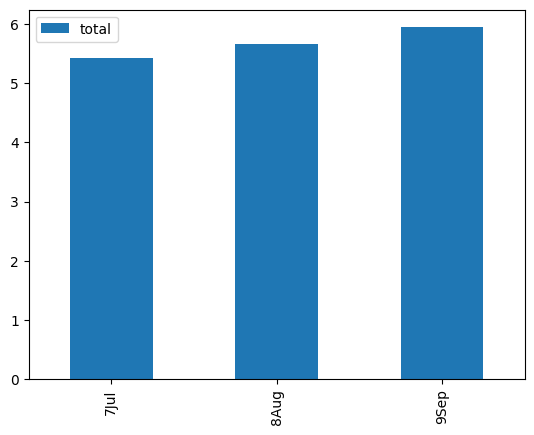

In [77]:
# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat([inv_jul,inv_aug,inv_sep], 
                            keys=('7Jul','8Aug','9Sep'))

# Group the invoices by the index keys and find avg of the total column
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({'total':'mean'})

# Bar plot of avg_inv_by_month
avg_inv_by_month.plot(kind='bar')
plt.show()

#### Verifying integrity

Why verify data integrity?
- Real world data is *NOT* clean
  
What to do?
- Fix incorrect data
- Drop duplicate rows

- `.merge()` and `.concat()` has special features that allow us to verify data structure.
  
- When ***merging*** two tables, we might expect the tables to have a *one-to-one* relationship. However, one of the columns we are merging on may have a duplicated value, which will turn the relationship into a *one-to-many*. 
  
- When ***concatenating*** tables vertically, we might unintentionally create duplicate records if a record exists in both tables. The `validate` and `verify_integrity` arguments of the merge and concat methods respectively will allow us to verify the data.



**Concatenate and merge to find common songs**

The senior leadership of the streaming service is requesting help again. We are given the historical files for a popular playlist in the classical music genre in 2018 and 2019. Additionally, we are given a similar set of files for the most popular pop music genre playlist on the streaming service in 2018 and 2019. Your goal is to concatenate the respective files to make a large classical playlist table and overall popular music table. Then filter the classical music table using a semi join to return only the most popular classical music tracks.

The tables `classic_18`, `classic_19`, and `pop_18`, `pop_19` needs to be created.

In [78]:
# # Concatenate the classic tables vertically
# classic_18_19 = pd.concat([classic_18, classic_19], ignore_index=True)

# # Concatenate the pop tables vertically
# pop_18_19 = pd.concat([pop_18, pop_19], ignore_index=True)

# # Merge classic_18_19 with pop_18_19
# classic_pop = classic_18_19.merge(pop_18_19, on='tid',how='inner')

# # Using .isin(), filter classic_18_19 rows where tid is in classic_pop
# popular_classic = classic_18_19[classic_18_19['tid'].isin(classic_pop['tid'])]

# # Print popular chart
# print(popular_classic)

# Merging Ordered and Time-Series Data

#### .merge_ordered()

<img src='../img/merge-ordered.jpg' width='500'>

The merge_ordered method will allow us to merge the left and right tables shown here. We can see the output of the merge when we merge on the "C" column. The results are similar to the standard merge method with an outer join, but here that the results are sorted. The sorted results make this a useful method for ordered or time-series data.

<img src='../img/merge_ordered_ex.jpg' width='500'>

In [79]:
gdp = pd.read_csv("../data/pandas_datasets/pandas-joins/WorldBank_GDP.csv")
gdp.head(5)

,Country Name,Country Code,Indicator Name,Year,GDP
0,China,CHN,GDP (current US$),2010,6.087160e+12
1,Germany,DEU,GDP (current US$),2010,3.417090e+12
2,Japan,JPN,GDP (current US$),2010,5.700100e+12
3,United States,USA,GDP (current US$),2010,1.499210e+13
4,China,CHN,GDP (current US$),2011,7.551500e+12


In [80]:
sp500 = pd.read_csv("../data/pandas_datasets/pandas-joins/S&P500.csv")
sp500.head(5)

,Date,Returns
0,2008,-38.49
1,2009,23.45
2,2010,12.78
3,2011,0.00
4,2012,13.41


In [81]:
# Use merge_ordered() to merge gdp and sp500, and forward fill missing values
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date', 
                             how='left',  fill_method='ffill')

In [82]:
gdp_sp500.head(5)

,Country Name,Country Code,Indicator Name,Year,GDP,Date,Returns
0,China,CHN,GDP (current US$),2010,6.087160e+12,2010,12.78
1,Germany,DEU,GDP (current US$),2010,3.417090e+12,2010,12.78
2,Japan,JPN,GDP (current US$),2010,5.700100e+12,2010,12.78
3,United States,USA,GDP (current US$),2010,1.499210e+13,2010,12.78
4,China,CHN,GDP (current US$),2011,7.551500e+12,2011,0.00


In [83]:
# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['GDP', 'Returns']]

In [84]:

# Print gdp_returns correlation
print (gdp_returns.corr())

              GDP   Returns
GDP      1.000000  0.040669
Returns  0.040669  1.000000


Finally, the correlation of 0.04 between the GDP and S&P500 is low to moderate at best. We may want to find another predictor if we plan to play in the stock market.

In [85]:
data = {'date': ['2013-06-01', '2014-01-01', '2014-06-01', '2015-01-01', '2015-06-01', '2016-01-01', '2016-06-01', '2017-01-01', '2017-06-01', '2018-01-01', '2018-06-01', '2019-01-01', '2019-06-01', '2020-01-01'],
        'unemployment_rate': [7.5, 6.7, 6.1, 5.6, 5.3, 5.0, 4.9, 4.7, 4.3, 4.1, 4.0, 3.9, 3.7, 3.5]}

unemployment = pd.DataFrame(data)

print(unemployment)

          date  unemployment_rate
0   2013-06-01                7.5
1   2014-01-01                6.7
2   2014-06-01                6.1
3   2015-01-01                5.6
4   2015-06-01                5.3
5   2016-01-01                5.0
6   2016-06-01                4.9
7   2017-01-01                4.7
8   2017-06-01                4.3
9   2018-01-01                4.1
10  2018-06-01                4.0
11  2019-01-01                3.9
12  2019-06-01                3.7
13  2020-01-01                3.5


In [86]:
data = {
    'date': ['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
    'cpi': [235.288, 235.547, 236.028, 236.468, 236.918, 237.231, 237.498, 237.460, 237.477, 237.430, 236.983, 236.252, 234.718, 235.236, 236.005, 236.156, 236.974, 237.684, 238.053, 238.028, 237.506, 237.781, 238.016, 237.817, 237.833, 237.469, 238.038, 238.827, 239.464, 240.167, 240.150, 240.602, 241.051, 241.691, 242.029, 242.772, 243.780, 243.961, 243.749, 244.051, 243.962, 244.182, 244.390, 245.297, 246.418, 246.587, 247.332, 247.901, 248.884, 249.369, 249.498, 249.956, 250.646, 251.134, 251.597, 251.879, 252.010, 252.794, 252.760, 252.723],
    'seriesid': ['CUSR0000SA0'] * 60,  # Efficiently repeat the series ID
    'data_type': ['SEASONALLY ADJUSTED INDEX'] * 60  # Efficiently repeat the data type
}

inflation = pd.DataFrame(data)

print(inflation)

          date      cpi     seriesid                  data_type
0   2014-01-01  235.288  CUSR0000SA0  SEASONALLY ADJUSTED INDEX
1   2014-02-01  235.547  CUSR0000SA0  SEASONALLY ADJUSTED INDEX
2   2014-03-01  236.028  CUSR0000SA0  SEASONALLY ADJUSTED INDEX
3   2014-04-01  236.468  CUSR0000SA0  SEASONALLY ADJUSTED INDEX
4   2014-05-01  236.918  CUSR0000SA0  SEASONALLY ADJUSTED INDEX
5   2014-06-01  237.231  CUSR0000SA0  SEASONALLY ADJUSTED INDEX
6   2014-07-01  237.498  CUSR0000SA0  SEASONALLY ADJUSTED INDEX
7   2014-08-01  237.460  CUSR0000SA0  SEASONALLY ADJUSTED INDEX
8   2014-09-01  237.477  CUSR0000SA0  SEASONALLY ADJUSTED INDEX
9   2014-10-01  237.430  CUSR0000SA0  SEASONALLY ADJUSTED INDEX
10  2014-11-01  236.983  CUSR0000SA0  SEASONALLY ADJUSTED INDEX
11  2014-12-01  236.252  CUSR0000SA0  SEASONALLY ADJUSTED INDEX
12  2015-01-01  234.718  CUSR0000SA0  SEASONALLY ADJUSTED INDEX
13  2015-02-01  235.236  CUSR0000SA0  SEASONALLY ADJUSTED INDEX
14  2015-03-01  236.005  CUSR0000SA0  SE

         date      cpi     seriesid                  data_type  \
0  2014-01-01  235.288  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
1  2014-06-01  237.231  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
2  2015-01-01  234.718  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
3  2015-06-01  237.684  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
4  2016-01-01  237.833  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
5  2016-06-01  240.167  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
6  2017-01-01  243.780  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
7  2017-06-01  244.182  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
8  2018-01-01  248.884  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
9  2018-06-01  251.134  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   

   unemployment_rate  
0                6.7  
1                6.1  
2                5.6  
3                5.3  
4                5.0  
5                4.9  
6                4.7  
7                4.3  
8                4.1  
9                4.0  


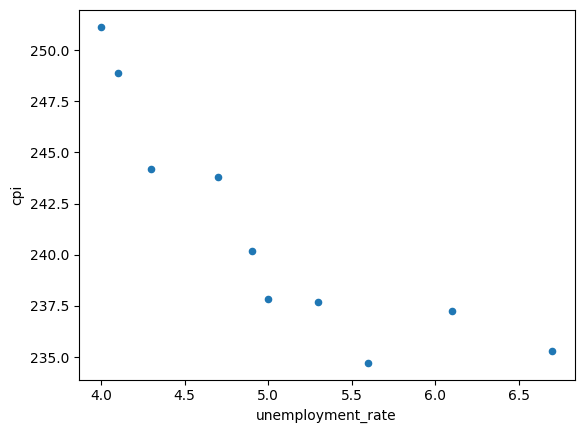

In [87]:
# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment, on='date', how='inner')

# Print inflation_unemploy 
print(inflation_unemploy)

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(x='unemployment_rate', y='cpi', kind='scatter')
plt.show()

There are critics of the curve, but what is more important in this example is that we were able to use entries where we had entries in both tables by using an inner join. You might ask why not use the default outer join and use forward fill to fill to estimate the missing variables. we might choose differently. In this case, instead of showing an estimated unemployment rate (which is a continually changing measure) for five periods, that data was dropped from the plot.

In [88]:
data = {
    'date': ['1990-01-01', '1991-01-01', '1992-01-01', '1993-01-01', '1990-01-01', '1991-01-01', '1992-01-01', '1993-01-01'],
    'country': ['Australia', 'Australia', 'Australia', 'Australia', 'Sweden', 'Sweden', 'Sweden', 'Sweden'],
    'pop': [17065100, 17284000, 17495000, 17667000, 8558835, 8617375, 8668067, 8718561],
    'series_code': ['SP.POP.TOTL'] * 8  # Efficiently repeat the series code
}

pop = pd.DataFrame(data)
pop.head(2)

,date,country,pop,series_code
0,1990-01-01,Australia,17065100,SP.POP.TOTL
1,1991-01-01,Australia,17284000,SP.POP.TOTL


In [89]:
data = {
    'date': ['1990-01-01', '1990-04-01', '1990-07-01', '1990-09-01', '1991-01-01', '1991-04-01', '1991-07-01', '1991-09-01', '1992-01-01', '1992-04-01', '1992-07-01', '1992-09-01', '1993-01-01', '1993-04-01', '1993-07-01', '1993-09-01', '1990-01-01', '1990-04-01', '1990-07-01', '1990-09-01', '1991-01-01', '1991-04-01', '1991-07-01', '1991-09-01', '1992-01-01', '1992-04-01', '1992-07-01', '1992-09-01', '1993-01-01', '1993-04-01', '1993-07-01', '1993-09-01'],
    'country': ['Australia'] * 16 + ['Sweden'] * 16,  # Efficiently repeat country names
    'gdp': [158051.132, 158263.582, 157329.279, 158240.678, 156195.954, 155989.033, 156635.858, 156744.057, 157916.081, 159047.827, 160658.176, 163960.221, 165097.495, 166027.059, 166203.179, 169279.348, 79837.846, 80582.286, 79974.360, 80106.497, 79524.242, 79073.059, 79084.770, 79740.606, 79390.922, 79060.283, 78904.605, 76996.837, 75783.588, 76708.548, 77662.018, 77703.304],
    'series_code': ['NYGDPMKTPSAKD'] * 32  # Efficiently repeat series code
}

gdp = pd.DataFrame(data)
gdp.head(2)

,date,country,gdp,series_code
0,1990-01-01,Australia,158051.132,NYGDPMKTPSAKD
1,1990-04-01,Australia,158263.582,NYGDPMKTPSAKD


In [90]:
ctry_date = pd.merge_ordered(gdp, pop, on=('date', 'country'))
ctry_date.head(5)

,date,country,gdp,series_code_x,pop,series_code_y
0,1990-01-01,Australia,158051.132,NYGDPMKTPSAKD,17065100.0,SP.POP.TOTL
1,1990-01-01,Sweden,79837.846,NYGDPMKTPSAKD,8558835.0,SP.POP.TOTL
2,1990-04-01,Australia,158263.582,NYGDPMKTPSAKD,NaN,NaN
3,1990-04-01,Sweden,80582.286,NYGDPMKTPSAKD,NaN,NaN
4,1990-07-01,Australia,157329.279,NYGDPMKTPSAKD,NaN,NaN


In [91]:
# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp, pop, on=('date', 'country'),
                             fill_method='ffill')

# Print ctry_date
print(ctry_date.head(5))

         date    country         gdp  series_code_x       pop series_code_y
0  1990-01-01  Australia  158051.132  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
1  1990-01-01     Sweden   79837.846  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
2  1990-04-01  Australia  158263.582  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
3  1990-04-01     Sweden   80582.286  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
4  1990-07-01  Australia  157329.279  NYGDPMKTPSAKD   8558835   SP.POP.TOTL


In [97]:
# Merge gdp and pop on country and date with fill
date_ctry = pd.merge_ordered(gdp, pop, on=('country','date'), fill_method='ffill')

# Print date_ctry
print(date_ctry.head(20))

          date    country         gdp  series_code_x       pop series_code_y
0   1990-01-01  Australia  158051.132  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
1   1990-04-01  Australia  158263.582  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
2   1990-07-01  Australia  157329.279  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
3   1990-09-01  Australia  158240.678  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
4   1991-01-01  Australia  156195.954  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
5   1991-04-01  Australia  155989.033  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
6   1991-07-01  Australia  156635.858  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
7   1991-09-01  Australia  156744.057  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
8   1992-01-01  Australia  157916.081  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
9   1992-04-01  Australia  159047.827  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
10  1992-07-01  Australia  160658.176  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
11  1992-09-01  Australia  163960.221  NYGDPMKTPSAKD  17495000   SP.POP.TOTL

- When we merge on `date` first, the table is sorted by `date` then `country`.
- When forward fill is applied, Sweden's population value in January is used to fill in the missing values for both Australia and Sweden for the remainder of the year. 
- This is not what we want. The fill forward is using unintended data to fill in the missing values.
- However, when we merge on country first, the table is sorted by country then date, so the forward fill is applied appropriately in this situation.

#### pd.merge_asof method

<img src='../img/merge_asof.jpg' width='600'>

The merge_asof() method is similar to an ordered left join. It has similar features as merge_ordered().
- However, unlike an ordered left join, merge_asof() will match on the nearest value columns rather than equal values. 
- This brings up an important point - whatever columns you merge on must be sorted. 
- In the table shown here, when we merge on column "C", we bring back all of the rows from the left table.

**When to use?**
- When working with data sampled from a process and the dates or times may not exactly align.
- When working on a time-series training set, where we do not want any events from the future to be visible before that point in time.

**Using merge_asof() to study stocks**

In [106]:
data = {
    'date_time': ['2017-11-17 15:35:17', '2017-11-17 15:40:04', '2017-11-17 15:45:01', '2017-11-17 15:50:55', '2017-11-17 15:55:00', '2017-11-17 16:00:30', '2017-11-17 16:05:07', '2017-11-17 16:10:08', '2017-11-17 16:15:11', '2017-11-17 16:20:29', '2017-11-17 16:25:25', '2017-11-17 16:30:53', '2017-11-17 16:35:11', '2017-11-17 16:40:44', '2017-11-17 16:45:52', '2017-11-17 16:50:37', '2017-11-17 16:55:02'],
    'close': [98.120, 98.180, 97.731, 97.740, 97.815, 98.020, 97.800, 97.840, 97.710, 97.760, 97.820, 97.950, 97.990, 98.060, 98.050, 98.110, 98.180]
}

jpm = pd.DataFrame(data)
# Convert 'date_time' to datetime objects (Absolutely crucial for time series)
jpm['date_time'] = pd.to_datetime(jpm['date_time'])

jpm.head(2)

,date_time,close
0,2017-11-17 15:35:17,98.12
1,2017-11-17 15:40:04,98.18


In [108]:
data = {
    'date_time': ['2017-11-17 15:35:08', '2017-11-17 15:40:00', '2017-11-17 15:45:32', '2017-11-17 15:50:07', '2017-11-17 15:55:00', '2017-11-17 16:00:30', '2017-11-17 16:05:52', '2017-11-17 16:10:22', '2017-11-17 16:15:43', '2017-11-17 16:20:07', '2017-11-17 16:25:13', '2017-11-17 16:30:04', '2017-11-17 16:35:32', '2017-11-17 16:40:09', '2017-11-17 16:45:24', '2017-11-17 16:50:28', '2017-11-17 16:55:42'],
    'close': [54.323, 54.320, 54.190, 54.170, 54.184, 54.265, 54.200, 54.155, 54.190, 54.205, 54.230, 54.220, 54.220, 54.280, 54.240, 54.170, 54.180]
}

wells = pd.DataFrame(data)
wells['date_time'] = pd.to_datetime(wells['date_time'])
wells.head(2)

,date_time,close
0,2017-11-17 15:35:08,54.323
1,2017-11-17 15:40:00,54.320


In [109]:
data = {
    'date_time': ['2017-11-17 15:35:17', '2017-11-17 15:40:06', '2017-11-17 15:45:05', '2017-11-17 15:50:34', '2017-11-17 15:55:06', '2017-11-17 16:00:18', '2017-11-17 16:05:20', '2017-11-17 16:10:05', '2017-11-17 16:15:07', '2017-11-17 16:20:29', '2017-11-17 16:25:00', '2017-11-17 16:30:18', '2017-11-17 16:35:08', '2017-11-17 16:40:46', '2017-11-17 16:45:55', '2017-11-17 16:50:05', '2017-11-17 16:55:02'],
    'close': [26.552, 26.552, 26.388, 26.378, 26.383, 26.452, 26.373, 26.388, 26.369, 26.388, 26.467, 26.482, 26.492, 26.527, 26.522, 26.547, 26.567]
}

bac = pd.DataFrame(data)
bac['date_time'] = pd.to_datetime(bac['date_time'])
bac.head(2)

,date_time,close
0,2017-11-17 15:35:17,26.552
1,2017-11-17 15:40:06,26.552


In [110]:
# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on='date_time', suffixes=('', '_wells'), direction='nearest')

In [111]:
# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on='date_time', suffixes=('_jpm', '_bac'), direction='nearest')

In [112]:
# Compute price diff
price_diffs = jpm_wells_bac.diff()

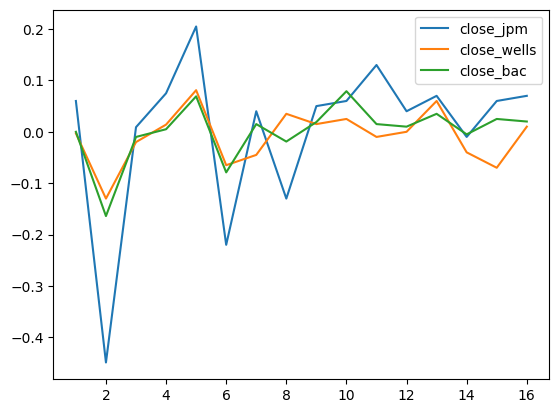

In [113]:
# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=['close_jpm', 'close_wells', 'close_bac'])
plt.show()

We can see that during this period, the price change for these bank stocks was roughly the same, although the price change for _JP Morgan_ was more variable. The critical point here is that the merge_asof() function is very useful in performing the fuzzy matching between the timestamps of all the tables.

**Using merge_asof() to create dataset**

In [115]:
data = {
    'date': ['1979-01-01', '1979-04-01', '1979-07-01', '1979-10-01', '1980-01-01', '1980-04-01', '1980-07-01', '1980-10-01', '1981-01-01', '1981-04-01', '1981-07-01', '1981-10-01', '1982-01-01', '1982-04-01', '1982-07-01', '1982-10-01', '1983-01-01', '1983-04-01', '1983-07-01', '1983-10-01', '1984-01-01', '1984-04-01', '1984-07-01', '1984-10-01'],
    'gdp': [2526.610, 2591.247, 2667.565, 2723.883, 2789.842, 2797.352, 2856.483, 2985.557, 3124.206, 3162.532, 3260.609, 3280.818, 3274.302, 3331.972, 3366.322, 3402.561, 3473.413, 3578.848, 3689.179, 3794.706, 3908.054, 4009.601, 4084.250, 4148.551]
}

gdp = pd.DataFrame(data)

# Convert 'date' to datetime objects (Crucial for time series)
gdp['date'] = pd.to_datetime(gdp['date'])
gdp.head(2)

,date,gdp
0,1979-01-01,2526.610
1,1979-04-01,2591.247


In [116]:
data = {
    'date': ['1980-01-01', '1980-08-01', '1981-07-01', '1982-12-01', '1990-07-01', '1991-04-01', '2001-03-01', '2001-12-01', '2007-12-01', '2009-07-01'],
    'econ_status': ['recession', 'normal', 'recession', 'normal', 'recession', 'normal', 'recession', 'normal', 'recession', 'normal']
}

recession = pd.DataFrame(data)

# Convert 'date' to datetime objects (Essential for time series)
recession['date'] = pd.to_datetime(recession['date'])
recession.head(2)

,date,econ_status
0,1980-01-01,recession
1,1980-08-01,normal


In [117]:
# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp, recession, on='date')

In [118]:
# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

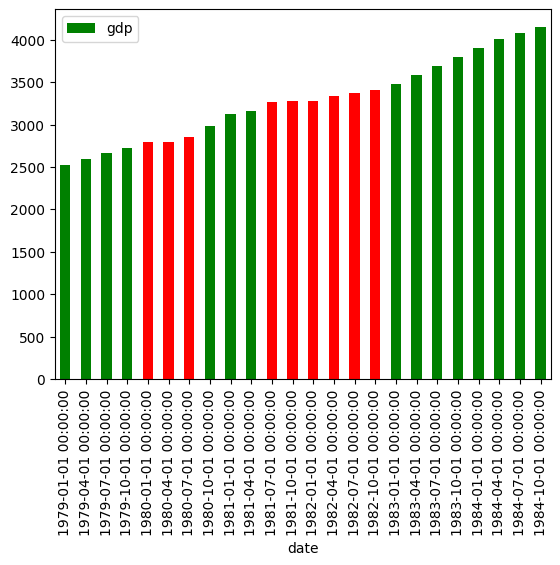

In [119]:
# Plot a bar chart of gdp_recession
gdp_recession.plot(kind='bar', y='gdp', x='date', color=is_recession, rot=90)
plt.show()

- We can see from the chart that there were a number of quarters early in the 1980s where a recession was an issue. merge_asof() allowed you to quickly add a flag to the gdp dataset by matching between two different dates, in one line of code!
- If you were to perform the same task using subsetting, it would have taken a lot more code.

| merge_asof() | Both | merge_ordered() |
|-------------|------|----------------|
| It can be used to do fuzzy matching of dates between tables. ✅ | This function can be used when working with ordered or time-series data. ✅ | It allows for a right join during the merge. ✅ |
| After matching two tables, if there are missing values at the top of the table from the right table, this function can fill them in. ✅ | This function can set the suffix for overlapping column names. ✅ | If it cannot match the rows of the tables exactly, it can use forward fill to interpolate the missing data. ✅ |

#### Selecting data with .query()

- Pandas provides many methods for selecting data, and query() is one of them.
- The query() method accepts an input string that it will use to select rows to return from the table.

In [124]:
data = {'date': ['1990-01-01', '1990-04-01', '1990-07-01', '1990-09-01', '1991-01-01', '1991-04-01', '1991-07-01', '1991-09-01', '1992-01-01', '1992-04-01', '1992-07-01', '1992-09-01', '1993-01-01', '1993-04-01', '1993-07-01', '1993-09-01', '1990-01-01', '1990-04-01', '1990-07-01', '1990-09-01', '1991-01-01', '1991-04-01', '1991-07-01', '1991-09-01', '1992-01-01', '1992-04-01', '1992-07-01', '1992-09-01', '1993-01-01', '1993-04-01', '1993-07-01', '1993-09-01'],
        'country': ['Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden'],
        'gdp': [158051.132, 158263.582, 157329.279, 158240.678, 156195.954, 155989.033, 156635.858, 156744.057, 157916.081, 159047.827, 160658.176, 163960.221, 165097.495, 166027.059, 166203.179, 169279.348, 79837.846, 80582.286, 79974.360, 80106.497, 79524.242, 79073.059, 79084.770, 79740.606, 79390.922, 79060.283, 78904.605, 76996.837, 75783.588, 76708.548, 77662.018, 77703.304],
        'series_code': ['NYGDPMKTPSAKD'] * 32}  # Efficiently creates the series_code column

gdp = pd.DataFrame(data)

print(gdp.head(2))

         date    country         gdp    series_code
0  1990-01-01  Australia  158051.132  NYGDPMKTPSAKD
1  1990-04-01  Australia  158263.582  NYGDPMKTPSAKD


In [125]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['country','date'], fill_method='ffill')

In [126]:
# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

In [127]:
# Pivot data so gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'date', 'country')

In [128]:
# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('date >= "1991-01-01"')

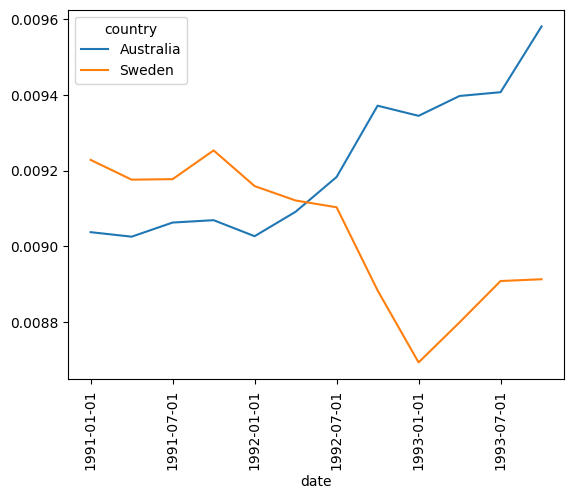

In [129]:
# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

We can see from the plot that the per capita GDP of Australia passed Sweden in 1992.

#### Reshaping data with .melt()

In [155]:
import numpy as np

# Create complete data dictionary
data = {
    'year': ['2010', '2011', '2012', '2013', '2014', '2015', 
             '2016', '2017', '2018', '2019', '2020'],
    'jan': [9.8, 9.1, 8.3, 8.0, 6.6, 5.7, 4.9, 4.7, 4.1, 4.0, 3.6],
    'feb': [9.8, 9.0, 8.3, 7.7, 6.7, 5.5, 4.9, 4.6, 4.1, 3.8, 3.5],
    'mar': [9.9, 9.0, 8.2, 7.5, 6.7, 5.4, 5.0, 4.4, 4.0, 3.8, 4.4],
    'apr': [9.9, 9.1, 8.2, 7.6, 6.2, 5.4, 5.0, 4.4, 4.0, 3.6, np.nan],
    'may': [9.6, 9.0, 8.2, 7.5, 6.3, 5.6, 4.8, 4.4, 3.8, 3.6, np.nan],
    'jun': [9.4, 9.1, 8.2, 7.5, 6.1, 5.3, 4.9, 4.3, 4.0, 3.7, np.nan],
    'jul': [9.4, 9.0, 8.2, 7.3, 6.2, 5.2, 4.8, 4.3, 3.8, 3.7, np.nan],
    'aug': [9.5, 9.0, 8.1, 7.2, 6.1, 5.1, 4.9, 4.4, 3.8, 3.7, np.nan],
    'sep': [9.5, 9.0, 7.8, 7.2, 5.9, 5.0, 5.0, 4.2, 3.7, 3.5, np.nan],
    'oct': [9.4, 8.8, 7.8, 7.2, 5.7, 5.0, 4.9, 4.1, 3.8, 3.6, np.nan],
    'nov': [9.8, 8.6, 7.7, 6.9, 5.8, 5.1, 4.7, 4.2, 3.7, 3.5, np.nan],
    'dec': [9.3, 8.5, 7.9, 6.7, 5.6, 5.0, 4.7, 4.1, 3.9, 3.5, np.nan]
}

# Create DataFrame
ur_wide = pd.DataFrame(data)

# Verify the structure
print("DataFrame Info:")
print(ur_wide.info())

print("\nFirst few rows:")
print(ur_wide.head())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    11 non-null     object 
 1   jan     11 non-null     float64
 2   feb     11 non-null     float64
 3   mar     11 non-null     float64
 4   apr     10 non-null     float64
 5   may     10 non-null     float64
 6   jun     10 non-null     float64
 7   jul     10 non-null     float64
 8   aug     10 non-null     float64
 9   sep     10 non-null     float64
 10  oct     10 non-null     float64
 11  nov     10 non-null     float64
 12  dec     10 non-null     float64
dtypes: float64(12), object(1)
memory usage: 1.2+ KB
None

First few rows:
   year  jan  feb  mar  apr  may  jun  jul  aug  sep  oct  nov  dec
0  2010  9.8  9.8  9.9  9.9  9.6  9.4  9.4  9.5  9.5  9.4  9.8  9.3
1  2011  9.1  9.0  9.0  9.1  9.0  9.1  9.0  9.0  9.0  8.8  8.6  8.5
2  2012  8.3  8.3  8.2  8.2  8.2  8.2  8.2  8.1

/var/folders/jn/9nlkdx3s70bfdjtw_1q5jnvm0000gn/T/ipykernel_43965/2147242117.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ur_tall['date'] = pd.to_datetime(ur_tall['month'] + '-' + ur_tall['year'])


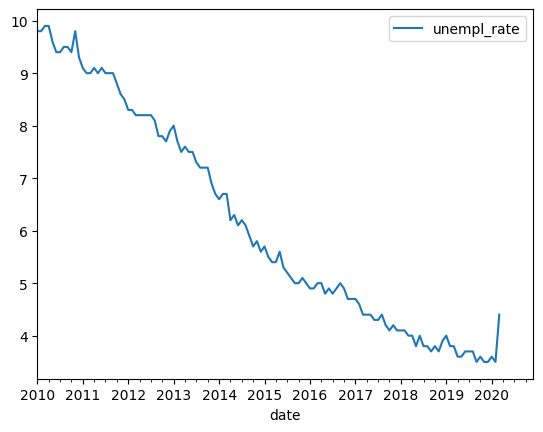

In [156]:
# unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars=['year'], var_name='month', value_name='unempl_rate')


# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['month'] + '-' + ur_tall['year'])

# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values('date')

# Plot the unempl_rate by date
# Plot the unempl_rate by date
ur_sorted.plot(x='date', y='unempl_rate')
plt.show()

The plot shows a steady decrease in the unemployment rate with an increase near the end. This increase is likely the effect of the COVID-19 pandemic and its impact on shutting down most of the US economy. In general, data is often provided (_especially by governments_) in a format that is easily read by people but not by machines.

**Using .melt() for stocks vs bond performance**

- It is widespread knowledge that the price of bonds is inversely related to the price of stocks.
- We have been given a table of percent change of the `US 10-year treasury bond price`. It is in a wide format where there is a separate column for each year. We will need to use the .melt() method to reshape this table.
- Additionally, we will use the .query() method to filter out unneeded data. We will merge this table with a table of the `percent change of the Dow Jones Industrial stock index price`. Finally, you will plot data.

In [136]:
# Define the data
columns = ["metric", "2007-02-01", "2007-03-01", "2007-04-01", "2007-05-01", "2007-06-01", "2007-07-01", 
           "2007-08-01", "2007-09-01", "2007-10-01", "2007-11-01", "2007-12-01", "2008-01-01", "2008-02-01", 
           "2008-03-01", "2008-04-01", "2008-05-01", "2008-06-01", "2008-07-01", "2008-08-01", "2008-09-01", 
           "2008-10-01", "2008-11-01", "2008-12-01", "2009-01-01", "2009-02-01", "2009-03-01", "2009-04-01", 
           "2009-05-01", "2009-06-01", "2009-07-01", "2009-08-01", "2009-09-01", "2009-10-01", "2009-11-01", "2009-12-01"]

data = [
    ["open", 0.033, -0.060, 0.025, -0.004, 0.061, 0.027, -0.059, -0.046, 0.014, -0.027, -0.115, 0.023, -0.094, -0.025, -0.021, 0.076, 0.073, -0.021, 0.000, -0.024, -0.026, 0.050, -0.268, -0.236, 0.286, 0.046, -0.103, 0.191, 0.107, 0.024, -0.007, -0.047, -0.032, 0.034, -0.051],
    ["high", -0.007, -0.041, 0.022, 0.031, 0.080, -0.022, -0.060, -0.038, 0.004, -0.056, -0.039, -0.053, -0.023, -0.065, 0.050, 0.065, 0.045, -0.035, -0.020, -0.045, 0.052, -0.035, -0.272, -0.011, 0.069, -0.004, 0.041, 0.187, 0.068, -0.062, 0.032, -0.090, 0.012, -0.004, 0.099],
    ["low", -0.016, -0.008, 0.031, -0.002, 0.059, -0.027, -0.052, -0.043, 0.003, -0.108, -0.001, -0.146, 0.075, -0.067, 0.043, 0.073, 0.047, -0.023, -0.002, -0.136, 0.046, -0.138, -0.304, 0.059, 0.217, -0.062, 0.069, 0.168, 0.123, -0.055, 0.040, -0.036, -0.051, 0.030, 0.007],
    ["close", -0.057, 0.022, -0.004, 0.056, 0.029, -0.052, -0.049, 0.009, -0.023, -0.112, 0.016, -0.098, -0.029, -0.029, 0.095, 0.076, -0.017, 0.000, -0.042, 0.004, 0.037, -0.255, -0.241, 0.267, 0.069, -0.117, 0.164, 0.109, 0.017, -0.006, -0.029, -0.028, 0.026, -0.056, 0.201]
]

# Create DataFrame
ten_yr = pd.DataFrame(data, columns=columns)

# Display DataFrame
print(ten_yr.head(5))

  metric  2007-02-01  2007-03-01  2007-04-01  2007-05-01  2007-06-01  \
0   open       0.033      -0.060       0.025      -0.004       0.061   
1   high      -0.007      -0.041       0.022       0.031       0.080   
2    low      -0.016      -0.008       0.031      -0.002       0.059   
3  close      -0.057       0.022      -0.004       0.056       0.029   

   2007-07-01  2007-08-01  2007-09-01  2007-10-01  ...  2009-03-01  \
0       0.027      -0.059      -0.046       0.014  ...       0.046   
1      -0.022      -0.060      -0.038       0.004  ...      -0.004   
2      -0.027      -0.052      -0.043       0.003  ...      -0.062   
3      -0.052      -0.049       0.009      -0.023  ...      -0.117   

   2009-04-01  2009-05-01  2009-06-01  2009-07-01  2009-08-01  2009-09-01  \
0      -0.103       0.191       0.107       0.024      -0.007      -0.047   
1       0.041       0.187       0.068      -0.062       0.032      -0.090   
2       0.069       0.168       0.123      -0.055       0

In [151]:
import io
# Data as string (with proper formatting)
data_str = """date,close
2007-02-01,0.005
2007-03-01,-0.026
2007-04-01,0.049
2007-05-01,0.052
2007-06-01,-0.016
2007-07-01,0.038
2007-08-01,-0.064
2007-09-01,0.067
2007-10-01,0.002
2007-11-01,-0.024
2007-12-01,-0.011
2008-01-01,-0.059
2008-02-01,-0.036
2008-03-01,0.013
2008-04-01,0.021
2008-05-01,-0.001
2008-06-01,-0.043
2008-07-01,-0.057
2008-08-01,0.025
2008-09-01,-0.069
2008-10-01,-0.154
2008-11-01,-0.080
2008-12-01,0.058
2009-01-01,-0.037
2009-02-01,-0.165
2009-03-01,0.042
2009-04-01,0.065
2009-05-01,0.057
2009-06-01,0.039
2009-07-01,-0.048
2009-08-01,0.111
2009-09-01,0.058
2009-10-01,-0.008
2009-11-01,0.077
2009-12-01,-0.003
2010-01-01,-0.022
2010-02-01,0.013
2010-03-01,0.051
2010-04-01,0.016
2010-05-01,-0.080
2010-06-01,-0.036
2010-07-01,0.078
2010-08-01,-0.034
2010-09-01,0.067
2010-10-01,0.024
2010-11-01,-0.002
2010-12-01,0.040
2011-01-01,0.031
2011-02-01,0.014
2011-03-01,-0.002
2011-04-01,0.03242
2011-05-01,0.001199
2011-06-01,-0.002194
2011-07-01,0.002626
2011-08-01,-0.06696
2011-09-01,-0.03641
2011-10-01,0.02568
2011-11-01,0.001359
2011-12-01,0.04591
2012-01-01,0.05260
2012-02-01,0.01774
2012-03-01,0.02592
2012-04-01,-0.009181
2012-05-01,-0.05326
2012-06-01,0.03477
2012-07-01,-0.0001404
2012-08-01,0.03502
2012-09-01,0.02425
2012-10-01,-0.01827
2012-11-01,-0.02697
2012-12-01,0.01186
2013-01-01,0.02802
2013-02-01,0.03652
2013-03-01,0.02349
2013-04-01,0.03738
2013-05-01,0.01685
2013-06-01,-0.0002249
2013-07-01,0.02563
2013-08-01,-0.04249
2013-09-01,0.02812
2013-10-01,0.007576
2013-11-01,0.03268
2013-12-01,0.01838
2014-01-01,0.01590
2014-02-01,-0.01494
2014-03-01,0.01477
2014-04-01,0.007108
2014-05-01,0.01099
2014-06-01,0.006544
2014-07-01,-0.9930
2014-08-01,144.5
2014-09-01,-0.003246
2014-10-01,0.02040
2014-11-01,0.02517
2014-12-01,-0.000286
2015-01-01,-0.03693
2015-02-01,0.05638
2015-03-01,-0.01967
2015-04-01,0.01475
2015-05-01,-0.001530
2015-06-01,-0.02172
2015-07-01,0.006379
2015-08-01,-0.06789
2015-09-01,-0.02575
2015-10-01,0.09695
2015-11-01,0.003193
2015-12-01,-0.01664
2016-01-01,-0.05502
2016-02-01,0.003049
2016-03-01,0.07075
2016-04-01,0.005004
2016-05-01,0.0007652
2016-06-01,0.008028
2016-07-01,0.02801
2016-08-01,-0.001698
2016-09-01,-0.005038
2016-10-01,-0.009056
2016-11-01,0.05408
2016-12-01,0.03341
2017-01-01,0.005136
2017-02-01,0.04773
2017-03-01,-0.007159
2017-04-01,0.01342
2017-05-01,0.003257
2017-06-01,0.01623
2017-07-01,0.02536
2017-08-01,0.002604
2017-09-01,0.02082
2017-10-01,0.04339
2017-11-01,0.03829
2017-12-01,0.01841
2018-01-01,0.05786
2018-02-01,-0.04284
2018-03-01,-0.03466
2018-04-01,0.00006208
2018-05-01,0.01046
2018-06-01,-0.005914
2018-07-01,0.04713
2018-08-01,0.02162
2018-09-01,0.01901
2018-10-01,-0.05074
2018-11-01,0.01683
2018-12-01,-0.08658
2019-01-01,0.07168
2019-02-01,0.03665
2019-03-01,0.000490
2019-04-01,0.02562
2019-05-01,-0.06686
2019-06-01,0.07811
2019-07-01,NaN
2019-08-01,NaN
2019-09-01,NaN
2019-10-01,0.006779
2019-11-01,NaN
2019-12-01,NaN
2020-01-01,NaN
2020-02-01,-0.01045
2020-03-01,-0.2161
2020-04-01,0.03480"""

# Create DataFrame
dji = pd.read_csv(io.StringIO(data_str))

# Verify the shape
print(f"DataFrame shape: {dji.shape}")

DataFrame shape: (159, 2)


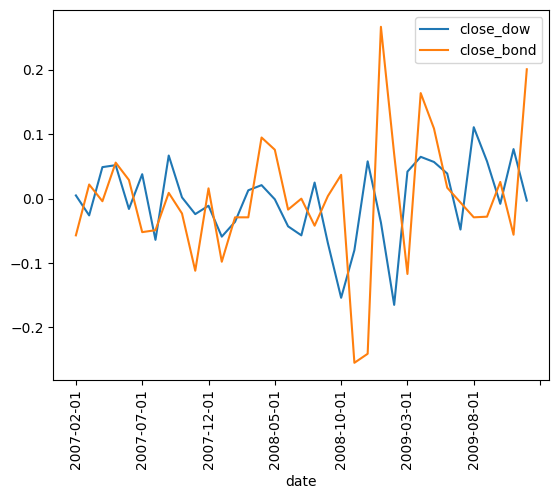

In [153]:
# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars='metric', var_name='date', value_name='close')

# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query('metric == "close"')

# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji, bond_perc_close, on='date', how='inner', suffixes=('_dow', '_bond'))

# Plot only the close_dow and close_bond columns
dow_bond.plot(y=['close_dow', 'close_bond'], x='date', rot=90)
plt.show()

The plot confirms that the bond and stock prices are inversely correlated. Often as the price of stocks increases, the price for bonds decreases.